In [1]:
import cv2 
import imutils
import matplotlib.pyplot as plt 

# Image importing

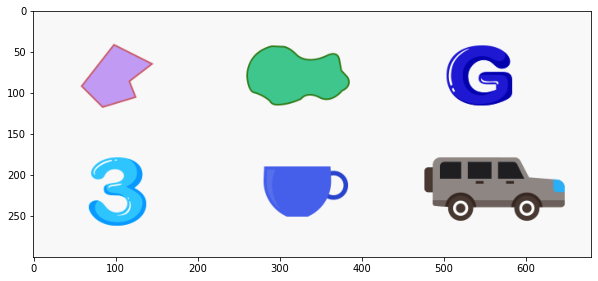

In [2]:
img = cv2.imread("data/figures.png")

plt.figure(figsize=(10, 10))
plt.imshow(img)

plt.show()

# Processing

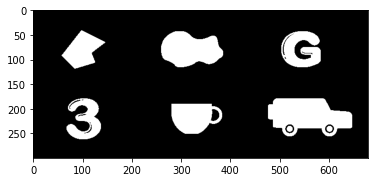

In [3]:
img_blur = cv2.medianBlur(img, 25)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,220,255,cv2.THRESH_BINARY_INV) 

plt.imshow(thresh, cmap='gray')

plt.show()

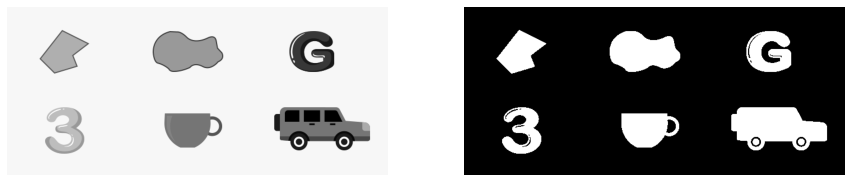

In [4]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresh, cmap='gray')
plt.axis('off')

plt.show()

In [5]:
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

print(f'Amount of objects found: {len(contours)}')

Amount of objects found: 6


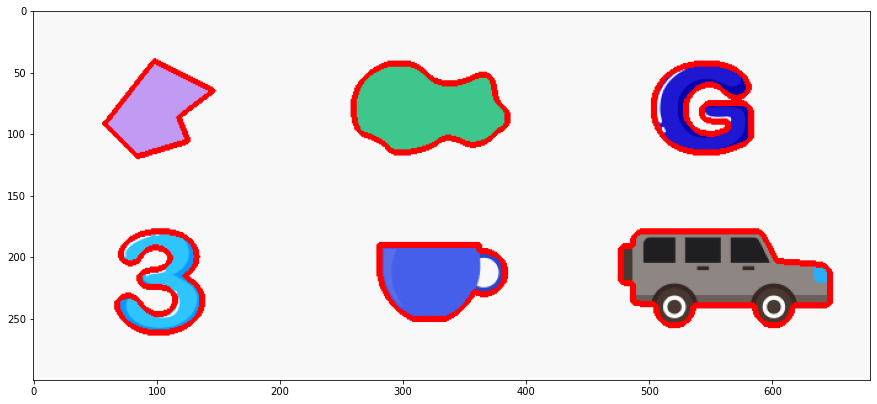

In [6]:
with_contours = cv2.drawContours(img,contours,-1,(255,0,0), 3) 

plt.figure(figsize=(15, 15))

plt.imshow(img)
plt.show()

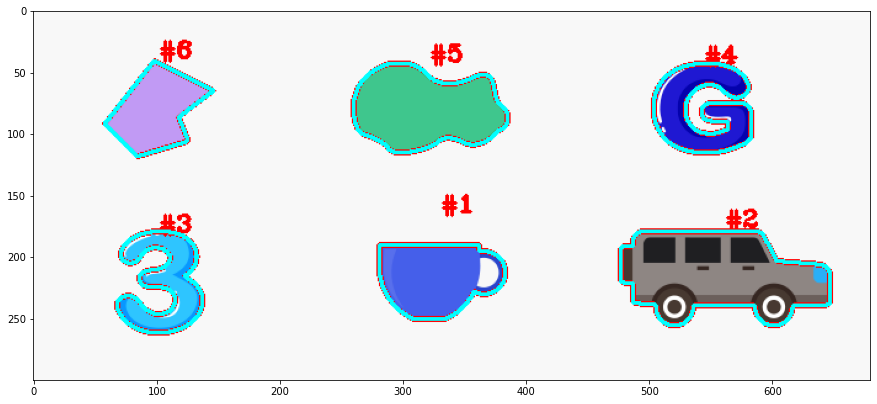

In [7]:
plt.figure(figsize=(15, 15))

for itr, cnt in enumerate(contours):
    (x, y), _ = cv2.minEnclosingCircle(cnt)
    x, y = int(x), int(y)
    cv2.putText(img, f'#{itr + 1}', (x, y - 40),
                cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 2)
    cv2.drawContours(img, [cnt], -1, (0,255,255), 2)

plt.imshow(img)
plt.show()